In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

2025-12-31 16:33:57.695820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-31 16:34:15.587524: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-31 16:34:23.022321: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/workspaces/SkinCancerCapstone/.venv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [39]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

In [40]:
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
labels = {
    0: 'benign',
    1: 'malignant',
}

## Big model

First, we'll test the big model trained on 299x299 pictures. 

You can either use your own model, or download the one we trained for the book:

```
wget https://github.com/alexeygrigorev/mlbookcamp-code/releases/download/chapter7-model/xception_v4_large_08_0.894.h5
```

In [42]:
image_size = (224, 224)

In [43]:
model = keras.models.load_model('ResNet_v4_large_15_0.906.h5')

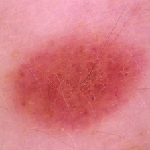

In [82]:
path = 'data/test/benign/44.jpg'
img = load_img(path, target_size=(image_size))
img

First, pre-process the image:

In [83]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

And get the prediction:

In [84]:
pred = model.predict(X)
pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([ 5.6241336, -5.4211407], dtype=float32)

In [85]:
pred.shape

(1, 2)

To the actual class, we need to see what's the biggest value. We do it by using `argmax`:

In [86]:
pred[0].argmax()

np.int64(0)

To convert it to the label, let's use the `labels` dictionary:

In [87]:
labels[pred[0].argmax()]

'benign'

Now let's apply it to the entire testing dataset

- first, we'll create a generator
- then use the `evaluate` function to get accuracy 

In [74]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "data/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 660 images belonging to 2 classes.


In [75]:
model.evaluate(test_ds)

2025-12-30 16:15:03.448439: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 102760448 exceeds 10% of free system memory.
2025-12-30 16:15:03.546373: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 106463232 exceeds 10% of free system memory.
2025-12-30 16:15:03.591683: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 102760448 exceeds 10% of free system memory.
2025-12-30 16:15:03.675103: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 102760448 exceeds 10% of free system memory.
2025-12-30 16:15:03.802096: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 102760448 exceeds 10% of free system memory.


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9061 - loss: 0.2828


[0.28275951743125916, 0.9060605764389038]

## Print Predictions for Malignant Folder

In [88]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

In [90]:
# Using os.listdir()
folder_path = 'data/test/malignant'
image_files = [f for f in os.listdir(folder_path) 
               if f.lower().endswith(('.jpg'))]

images = []
for filename in image_files:
    img_path = os.path.join(folder_path, filename)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    images.append(img_array)

In [99]:
# Convert to batch and preprocess
batch = np.array(images) 
batch = preprocess_input(batch)

# Predict
predictions = model.predict(batch)
predictions = tf.nn.softmax(predictions, axis=1).numpy()
predicted_classes = np.argmax(predictions, axis=1)

# Print results
for filename, pred_class, confidence in zip(image_files, predicted_classes, predictions):
    print(f"{filename}: Class: {labels[pred_class]} (confidence: {confidence[pred_class]:.2})")

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step
257.jpg: Class: malignant (confidence: 1.0)
129.jpg: Class: malignant (confidence: 1.0)
66.jpg: Class: malignant (confidence: 1.0)
258.jpg: Class: malignant (confidence: 1.0)
450.jpg: Class: malignant (confidence: 1.0)
570.jpg: Class: malignant (confidence: 1.0)
1380.jpg: Class: benign (confidence: 0.95)
424.jpg: Class: malignant (confidence: 0.98)
773.jpg: Class: malignant (confidence: 1.0)
817.jpg: Class: malignant (confidence: 1.0)
744.jpg: Class: malignant (confidence: 0.96)
1280.jpg: Class: malignant (confidence: 0.52)
995.jpg: Class: malignant (confidence: 0.89)
1438.jpg: Class: benign (confidence: 0.78)
838.jpg: Class: malignant (confidence: 0.93)
1056.jpg: Class: benign (confidence: 0.87)
749.jpg: Class: malignant (confidence: 1.0)
1322.jpg: Class: malignant (confidence: 0.94)
1005.jpg: Class: malignant (confidence: 0.96)
399.jpg: Class: malignant (confidence: 0.97)
81.jpg: Class: malignant (confidence: 1.0)
1267.jpg: Class: malignant (con

In [100]:
results_df = pd.DataFrame({
    'filename': image_files,
    'predicted_class': predicted_classes,
    'confidence': [predictions[i][predicted_classes[i]] for i in range(len(predictions))]
})

In [101]:
print(results_df)

     filename  predicted_class  confidence
0     257.jpg                1    0.995025
1     129.jpg                1    0.999734
2      66.jpg                1    0.999498
3     258.jpg                1    0.999989
4     450.jpg                1    0.995086
..        ...              ...         ...
295   504.jpg                1    0.999892
296  1218.jpg                1    0.997514
297   501.jpg                1    0.997956
298   184.jpg                1    0.791917
299  1347.jpg                0    0.633354

[300 rows x 3 columns]


## Small model

After testing the big model, let's test the small model trained on 150x150 images

In [78]:
model = keras.models.load_model('ResNet_v3_12_0.902.h5')

In [79]:
image_size = (150, 150)

In [80]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    "data/test",
    shuffle=False,
    target_size=image_size,
    batch_size=32,
)

Found 660 images belonging to 2 classes.


In [92]:
model.evaluate(test_ds)

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 766ms/step - accuracy: 0.9015 - loss: 0.2709


[0.27090170979499817, 0.9015151262283325]